Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
gold_data=pd.read_csv('/content/gld_price_data.csv')


In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [13]:
correlation=gold_data.corr(numeric_only=True)

<Axes: >

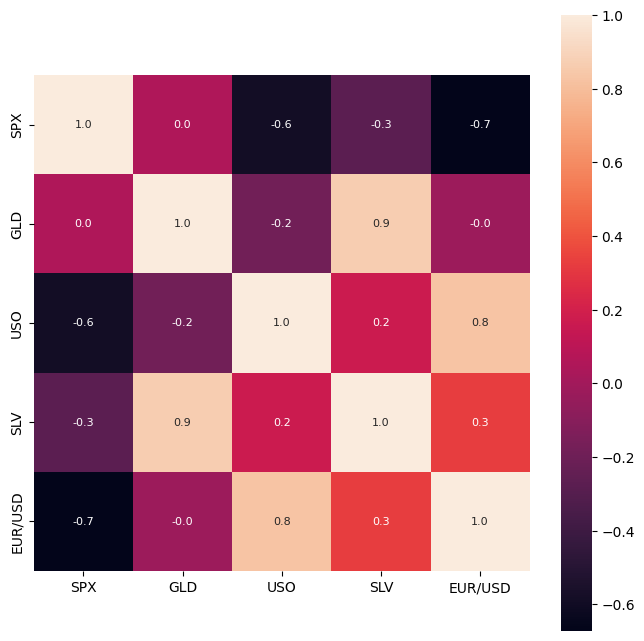

In [16]:
from __future__ import annotations
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-732148799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='g')


<Axes: xlabel='GLD', ylabel='Density'>

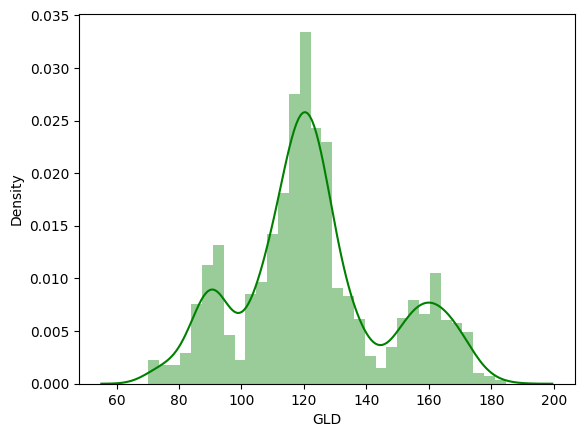

In [18]:
sns.distplot(gold_data['GLD'],color='g')

In [19]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
reg=RandomForestRegressor(n_estimators=100)

In [23]:
reg.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [24]:
Y_pred=reg.predict(X_test)

In [25]:
print(Y_pred)

[168.39119878  81.77439986 115.97949965 127.6288007  120.74630098
 154.83759836 150.26909889 126.14550062 117.46839887 126.27629996
 116.64330074 171.81380083 141.27739829 168.06089857 115.19069991
 117.86550042 139.73920334 170.09660086 159.3266027  160.87109884
 155.31290046 125.17809989 176.19939917 157.35000338 125.12560011
  93.85699997  76.8889003  120.86149973 118.96609879 167.43800013
  88.10110014 125.17599997  91.11450074 117.63170049 121.13889883
 135.95580034 115.6423014  114.85770052 147.40659959 107.08300097
 104.16710262  87.11899794 126.47740078 117.84520011 154.11889865
 119.49959984 108.21030043 107.95329822  93.17110044 127.24109747
  75.54420031 113.58269902 121.27069998 111.35099954 118.91669889
 120.36179937 159.14570031 166.67190138 147.06769696  85.82719876
  94.38940023  86.80819881  90.3527003  118.94470076 126.43310077
 127.60259995 169.73830008 122.25229918 117.49779889  98.90330005
 168.05640199 143.72309834 132.30150243 121.25610222 121.50159957
 119.73190

In [27]:
r2score=metrics.r2_score(Y_test,Y_pred)
print("R squared error: ",r2score)

R squared error:  0.9891559908990264


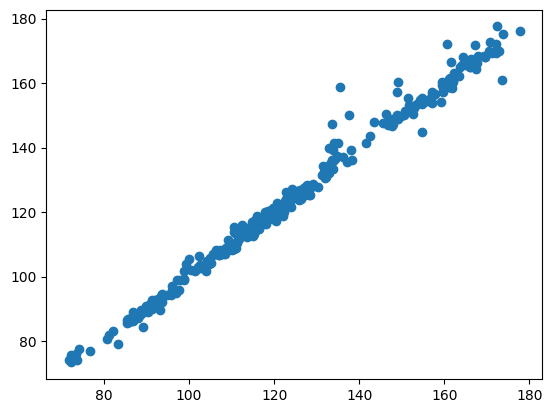

In [28]:
plt.scatter(Y_test,Y_pred)
plt.show()

In [29]:
#Converting test data to a list
Y_test=list(Y_test)

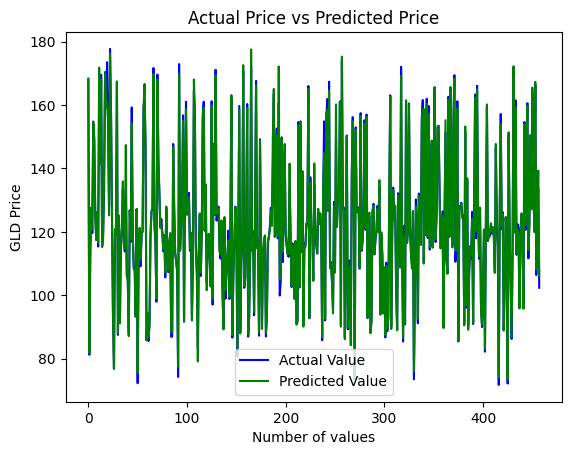

In [31]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(Y_pred,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()